In [70]:
import numpy as np
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [93]:
class LSSVM:
    def fit(self, X, y, gamma):
        n_sam, _ = X.shape

        K = X @ X.T

        omega = K + np.eye(n_sam) / gamma
        A = np.zeros((n_sam + 1, n_sam + 1))
        A[0, 0] = 0
        A[0, 1:] = 1
        A[1:, 0] = 1
        A[1:, 1:] = omega

        b_vec = np.zeros(n_sam + 1)
        b_vec[1:] = y

        solution = np.linalg.solve(A, b_vec)

        self.intercept_ = np.array([solution[0]])
        alpha = np.array([solution[1:]])

        self.coef_ = (alpha * y) @ X

    def predict(self, X):
        decision_function = X @ self.coef_.T + self.intercept_
        return np.sign(decision_function).ravel()

In [94]:
df = pd.read_csv('datasets/q2_data.csv').values
X = df[:, :2]
Y = df[:, 2]

In [95]:
svm = LSSVM()

In [96]:
svm.fit(X, Y, 0.5)

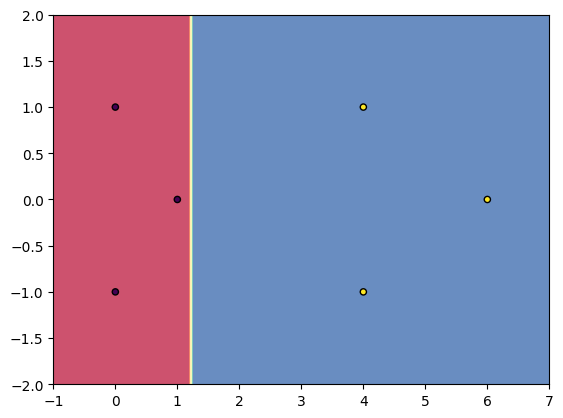

In [97]:
DecisionBoundaryDisplay.from_estimator(svm, X, response_method="predict", cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolors="k")

plt.show()